In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3 MB 6.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
#Loading the data
data = yf.download('SPY')

#Setting the date as index for data
data = data.reset_index()
data = data.set_index(pd.DatetimeIndex(data['Date'].values))
#Dropping unwanted columns
data.drop(data.columns[[3,5]], axis=1, inplace=True)
print(data)

[*********************100%***********************]  1 of 1 completed
                 Date        Open        High       Close     Volume
1993-01-29 1993-01-29   43.968750   43.968750   43.937500    1003200
1993-02-01 1993-02-01   43.968750   44.250000   44.250000     480500
1993-02-02 1993-02-02   44.218750   44.375000   44.343750     201300
1993-02-03 1993-02-03   44.406250   44.843750   44.812500     529400
1993-02-04 1993-02-04   44.968750   45.093750   45.000000     531500
...               ...         ...         ...         ...        ...
2021-11-24 2021-11-24  466.059998  469.570007  469.440002   61858800
2021-11-26 2021-11-26  462.339996  463.899994  458.970001  112669600
2021-11-29 2021-11-29  464.070007  466.559998  464.600006   86268800
2021-11-30 2021-11-30  462.000000  464.029999  455.559998  148559600
2021-12-01 2021-12-01  461.640015  464.670013  450.500000  131939200

[7264 rows x 5 columns]


In [3]:
#Normalizing/Removing null data points
data['Open'] = data['Open']/100
data['Close'] = data['Close']/100
data['High'] = data['High']/100
data['Volume'] = data['Volume']/1000000
#print(data)

nan_value_index = []

High = data.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        data['High'][i] = 0
Open = data.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        data['Open'][i] = 0
Volume = data.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        data['Volume'][i] = 0
Close = data.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        data['Close'][i] = 0

X = data[['High','Open', 'Volume']]
Y = data[['Close']]

In [4]:
#Splitting the data for training/testing
length = X.shape[0]
train = int(length*0.80)
X_train = X[:train]
Y_train = Y[:train]
X_test = X[train:]
Y_test = Y[train:]
#print("X_train", X_train.shape)
#print("y_train", Y_train.shape)
#print("X_test", X_test.shape)
#print("y_test", Y_test.shape)

#Training the Neural Network Model
model = Sequential()
#Adding the input and hidden layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
#Adding output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
#To compile the neural network model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
#Fitting the model to the training data
model.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
44/44 [==============================] - 1s 5ms/step - loss: 0.9745 - val_loss: 1.3458
Epoch 2/10
44/44 [==============================] - 0s 2ms/step - loss: 0.6798 - val_loss: 1.5037
Epoch 3/10
44/44 [==============================] - 0s 2ms/step - loss: 0.5464 - val_loss: 1.2028
Epoch 4/10
44/44 [==============================] - 0s 2ms/step - loss: 0.3030 - val_loss: 0.5544
Epoch 5/10
44/44 [==============================] - 0s 2ms/step - loss: 0.0681 - val_loss: 0.1388
Epoch 6/10
44/44 [==============================] - 0s 2ms/step - loss: 0.0260 - val_loss: 0.1107
Epoch 7/10
44/44 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.1151
Epoch 8/10
44/44 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 0.1231
Epoch 9/10
44/44 [==============================] - 0s 2ms/step - loss: 0.0200 - val_loss: 0.0776
Epoch 10/10
44/44 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0813


In [5]:
#Predicted Values
prediction = model.predict(X_test)
print(prediction*100)

[[170.59177]
 [169.91115]
 [170.79149]
 ...
 [345.8332 ]
 [345.31   ]
 [345.1452 ]]


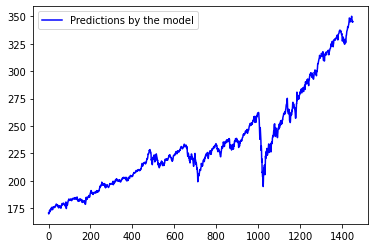

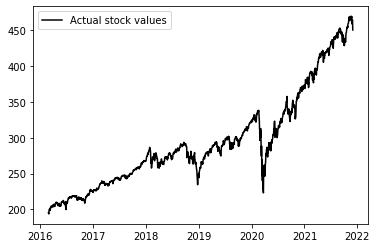

In [6]:
#Predictions vs Actual results
plt.plot(prediction*100,color='blue', label='Predictions by the model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test*100,color='black', label='Actual stock values')
plt.legend(loc='upper left')
plt.show()
#print(prediction)
#print(Y_test)

In [7]:
#Calculating the Accuracy of our trained Neural Network model
score = model.evaluate(X_test, Y_test, verbose = 0) 
print("Accuracy = ", (100-score), "%")

Accuracy =  99.58262351155281 %
